In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_theme(style="darkgrid")
random.seed(10)


/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# assign xs randomly to distribution a or b based on a proportion bernoulli
# generate random Xs on uniform distribution
# assign random labels a or b
# for gaussian, X is uniform
# create 1000 x uniform data points, assign a coin flip (bernoulli) that determines which model it goes to
# we know there are 2 data generating processes, both have normally distributed error term
# one of the model assumptions is constant variance and mean 0

# in gaussian mixed model you don't start with x values, just the bernoulli

In [3]:
bernoulli = random.random()
print(f'Random bernoulli variable is assigned as {bernoulli}')
x = np.random.uniform(0, 10, 1000)
label = np.random.binomial(1, bernoulli, 1000)

noise_a = np.random.normal(0, 1, 1000) 
noise_b = np.random.normal(0, 3, 1000)

d = {'x': x, 'label': label, 'noise_a': noise_a, 'noise_b': noise_b}
df = pd.DataFrame(data=d)

df.loc[df.label == 0, 'y'] = df.x * 3 + 2 + df.noise_a
df.loc[df.label == 1, 'y'] = df.x * 4 + 10 + df.noise_b

df

Random bernoulli variable is assigned as 0.5714025946899135


,x,label,noise_a,noise_b,y
0,1.873157,1,-0.675990,3.158827,20.651456
1,6.271017,1,1.882498,1.402829,36.486898
2,4.312602,1,0.008834,-1.044061,26.206348
3,2.895331,1,1.227937,2.715800,24.297126
4,9.972401,1,-0.252337,0.729286,50.618890
...,...,...,...,...,...
995,1.080109,1,-1.679334,-4.475258,9.845177
996,0.773476,1,-0.899656,-0.656186,12.437717
997,5.471206,1,1.847806,0.192839,32.077663
998,5.522886,0,-0.982514,3.202664,17.586146


<AxesSubplot:xlabel='x', ylabel='y'>

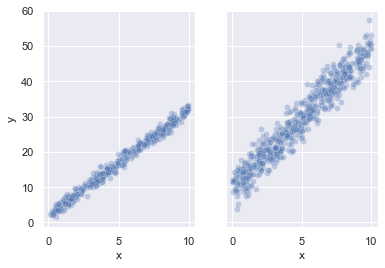

In [4]:
fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df[df.label == 0],x='x', y='y', alpha=0.3,ax=ax[0])
sns.scatterplot(data=df[df.label == 1],x='x', y='y', alpha=0.3,ax=ax[1])


<AxesSubplot:xlabel='x', ylabel='y'>

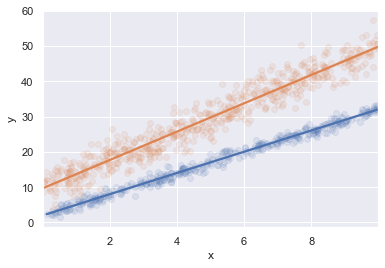

In [5]:
sns.regplot(data=df[df.label == 0],x='x', y='y',scatter_kws={'alpha':0.1})
sns.regplot(data=df[df.label == 1],x='x', y='y',scatter_kws={'alpha':0.1})
# you can see in plot below that they are different regressions


<AxesSubplot:xlabel='x', ylabel='Density'>

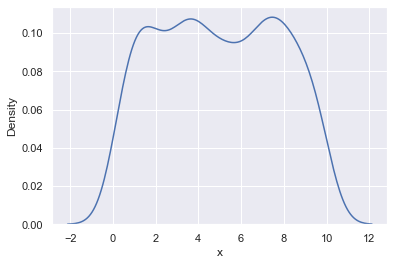

In [6]:
sns.kdeplot(data=df.x)

In [7]:
#### INITIALIZE
# set random picks for model 1 and model 2 variances (any positive number)
# beta 0 and 1 are both initialized to 1
# probability initialize to 0.5


#### EXPECTATION
# for each point, assign probability to assign to class 1 or not, and store these values. in binary case, only need 1
# given starting values, calculate probabilities. using formula, plug in x and y. store these values!


#### MAZIMIZE/UPDATE
# look at formula


In [31]:
# initialization
cov_a = random.randint(1, 2)
cov_b = random.randint(1, 2)

beta_a0 = beta_b0 = 0
beta_a1 = beta_b1 = 1
proba_a = proba_b = 0.5


In [32]:
def E(l):
    beta_a0=l[0]
    beta_b0=l[1]
    beta_a1=l[2]
    beta_b1=l[3]
    cov_a=l[4]
    cov_b=l[5]
    proba_a=l[6]
    proba_b=l[7]

    w_a = proba_a * (1/np.sqrt(2*np.pi*cov_a)) * np.exp((-1/(2*cov_a) * (df.y - beta_a0 - beta_a1*df.x)**2))
    w_b = proba_b * (1/np.sqrt(2*np.pi*cov_b)) * np.exp((-1/(2*cov_b) * (df.y - beta_b0 - beta_b1*df.x)**2))

    return(w_a, w_b)


In [ ]:
def M(l):
    
    w_a, w_b = E([beta_a0,
              beta_b0,
              beta_a1,
              beta_b1,
              cov_a,
              cov_b,
              proba_a,
              proba_b
             ])
    
    beta_a0 = ((df.y - beta_a1 * df.x) * w_a).sum()/ w_a.sum()
    beta_b0 = ((df.y - beta_b1 * df.x) * w_b).sum()/ w_b.sum()

    beta_a1 = ((df.y - beta_a0) * w_a).sum() / (df.x * w_a).sum()
    beta_b1 = ((df.y - beta_b0) * w_b).sum() / (df.x * w_b).sum()

    cov_a = ((df.y - beta_a1*df.x - beta_a0)**2 * w_a).sum()/w_a.sum()
    cov_b = ((df.y - beta_b1*df.x - beta_b0)**2 * w_b).sum()/w_b.sum()

    proba_a = w_a.sum()/ (w_a + w_b).sum()
    proba_b = w_b.sum()/ (w_a + w_b).sum()
    
    return([beta_a0,
              beta_b0,
              beta_a1,
              beta_b1,
              cov_a,
              cov_b,
              proba_a,
              proba_b,
            w_a,
            w_b])

    

In [45]:
def log_likely():
    #do stuff here
    

In [ ]:
## Maximization step
# def M(w_a,w_b):
#     num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

#     for i in range(0,len(d)):
#         num_mu1 += (1-eval1[i]) * d[i]
#         din_mu1 += (1-eval1[i])

#         num_mu2 += eval1[i] * d[i]
#         din_mu2 += eval1[i]

#     mu1 = num_mu1/din_mu1
#     mu2 = num_mu2/din_mu2

#     num_s1,din_s1,num_s2,din_s2=0,0,0,0
#     for i in range(0,len(d)):

#         q1 = np.matrix(d[i]-mu1)
#         num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
#         din_s1 += (1-eval1[i])

#         q2 = np.matrix(d[i]-mu2)
#         num_s2 += eval1[i] * np.dot(q2.T, q2)
#         din_s2 += eval1[i]

#     s1 = num_s1/din_s1
#     s2 = num_s2/din_s2

#     pi = sum(eval1)/len(d)
    
#     lis2=[mu1,mu2,s1,s2,pi]
#     return(lis2)

In [9]:
w_a = probability_a * (1/np.sqrt(2*np.pi*init_variance_a)) * np.exp((-1/(2*init_variance_a) * (df.y - beta_a0 - beta_a1*df.x)**2))
w_b = probability_b * (1/np.sqrt(2*np.pi*init_variance_b)) * np.exp((-1/(2*init_variance_b) * (df.y - beta_b0 - beta_b1*df.x)**2))

pd.DataFrame(data={'w_a': w_a, 'w_b': w_b})



,w_a,w_b
0,1.408960e-14,8.680697e-13
1,7.383331e-35,3.590406e-30
2,3.656388e-19,1.018191e-16
3,2.157247e-18,4.661822e-16
4,1.312107e-61,4.229894e-53
...,...,...
995,1.350092e-04,3.119579e-04
996,9.701231e-07,4.537105e-06
997,1.953981e-27,8.268571e-24
998,4.407369e-07,2.307178e-06


In [17]:
variance_a = ((w_a * (df.y - beta_a0 - beta_a1*df.x) ** 2) + (w_b*(df.y - beta_b0 - beta_b1*df.x)**2)).sum() / (0.5*(w_a + w_b).sum())
# variance_a = (w_a * (df.y - beta_a0 - beta_a1*df.x) ** 2).sum() / (0.5*(w_a.sum()))
variance_b = (w_b * (df.y - beta_b0 - beta_b1*df.x) ** 2).sum() / (0.5*(w_b.sum()))

print(variance_a, variance_b)


27.53247591545162 29.042107888873357


In [ ]:
beta_a1 = w_a * (df.y - beta_a0)